In [59]:
import numpy as np 
import cv2 # note: opencv imports image color channels as BGR instead of RGB
import os
import random 
import matplotlib.pyplot as plt

In [60]:
IMGPATH = os.path.expanduser("~/Documents/Skyseed/data/multispectral_testarea_2d_9m/testarea_rgb_single_pngs_9m/")
RESPATH = os.path.expanduser("~/Documents/Skyseed/image-classification/reports/segmentation/kmeans/")

# randfile = random.choice(os.listdir(IMGPATH))
randfile = "9054717_5512099.png"

# number of segments to find
K = 3
MAX_ITER = 100
EPSILON = 0.001

# load and reshape
img = cv2.imread(os.path.join(IMGPATH, randfile))
img.shape

(256, 256, 3)

In [61]:
img_flat = img.reshape((-1, 3))
img_flat = np.float32(img_flat)

img_flat.shape

(65536, 3)

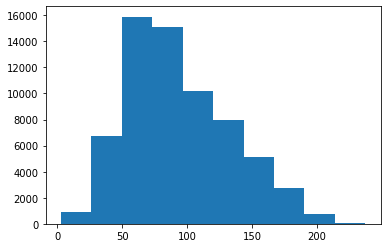

In [39]:
# look at dist of different color channels (B-0, G-1, R-2)
plt.hist(img_flat[:,0])
plt.show()

In [62]:

ret, label, center = cv2.kmeans(img_flat, K, None,
                                criteria=((cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER), MAX_ITER, EPSILON),
                                attempts=10,
                                flags=cv2.KMEANS_PP_CENTERS)

                            

In [63]:
center = np.uint8(center)
print(center)


[[ 55  68  71]
 [151 157 165]
 [ 96 107 113]]


In [64]:
res = center[label.flatten()]
res_img = res.reshape((img.shape))
res_img.shape


(256, 256, 3)

In [65]:
# save both original and segmented image to RESPATH
if randfile[:-4] + "_original.png" not in os.listdir(RESPATH):
    cv2.imwrite(os.path.join(RESPATH, randfile[:-4] + "_original.png"), img)
cv2.imwrite(os.path.join(RESPATH, randfile[:-4] + "_segmented_k=" + str(K) + ".png"), res_img)

TypeError: join() argument must be str or bytes, not 'int'